In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data Analysis

Row Fields:
DateTime Stamp; Bar OPEN Bid Quote; Bar HIGH Bid Quote; Bar LOW Bid Quote; Bar CLOSE Bid Quote; Volume

DateTime Stamp Format:
Excel Native

In [2]:
df = pd.read_excel('data/eur-gbp.xlsx', names=['date','open','high','low','close','volume'])
df.head()

,date,open,high,low,close,volume
0,2018-01-01 17:02:00,0.88800,0.88800,0.88800,0.88800,0
1,2018-01-01 17:03:00,0.88806,0.88806,0.88806,0.88806,0
2,2018-01-01 17:04:00,0.88806,0.88806,0.88806,0.88806,0
3,2018-01-01 17:05:00,0.88818,0.88818,0.88818,0.88818,0
4,2018-01-01 17:06:00,0.88812,0.88812,0.88812,0.88812,0


In [28]:
df.iloc[-1,0]

Timestamp('2018-12-31 16:58:00')

In [3]:
df.shape

(369383, 6)

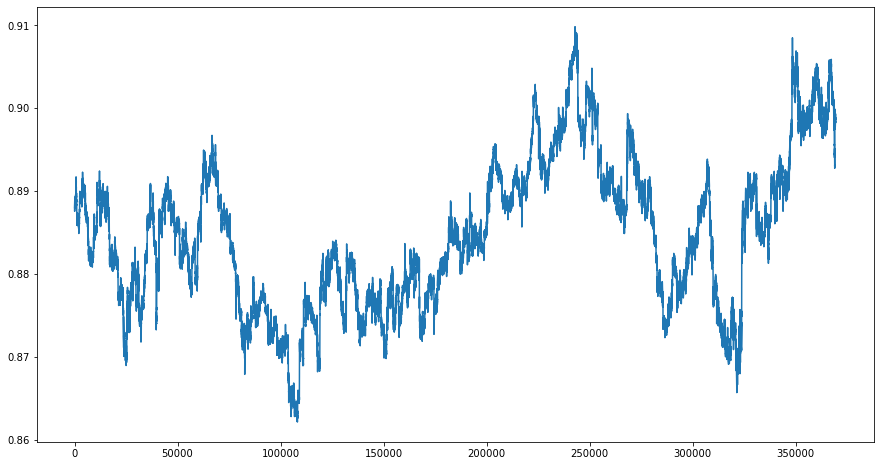

In [3]:
plt.figure(figsize=(15,8))
plt.plot(range(len(df)), df.iloc[:,4])

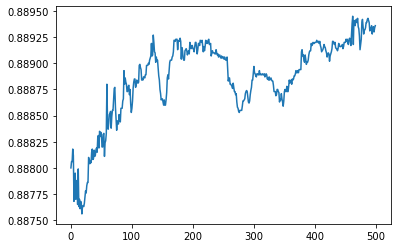

In [4]:
a = df['close'][:500]
plt.plot(range(len(a)), a)

In [6]:
l = len(df)
l/120

3078.1916666666666

In [15]:
df.date[120*502]

Timestamp('2018-02-28 16:38:00')

In [9]:
date = pd.to_datetime(df.date)

In [42]:
date[date.dt.to_period('M') == '2018-04']

91632    2018-04-01 17:02:00
91633    2018-04-01 17:04:00
91634    2018-04-01 17:05:00
91635    2018-04-01 17:06:00
91636    2018-04-01 17:07:00
                 ...        
121585   2018-04-30 23:55:00
121586   2018-04-30 23:56:00
121587   2018-04-30 23:57:00
121588   2018-04-30 23:58:00
121589   2018-04-30 23:59:00
Name: date, Length: 29958, dtype: datetime64[ns]

In [43]:
91632/120

763.6

In [18]:
91631/120

763.5916666666667

In [54]:
df.date[121589]

Timestamp('2018-04-30 23:59:00')

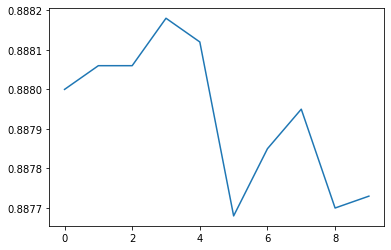

In [46]:
num = 10
plt.plot( range(num), df.close[:num])

### Modelling

In [20]:
from keras import Model
from keras.layers import Input, concatenate, Dense, Flatten
from keras.utils import plot_model

import pydot
import graphviz
import pydotplus

In [21]:
window = 120

In [22]:
# Inputs
price_input = Input(shape=(window,), name='price input')
bank_input = Input(shape=(1,), name='env input')

# Adjsusted model
price_layer1 = Dense(32, activation='relu', name='price_layer1')(price_input)
price_layer2 = Dense(16, activation='relu', name='price_layer2')(price_layer1)
price_final = Flatten(name='ts_flatten')(price_layer2)

# Fixed layers and output
concat_layer = concatenate([price_final, bank_input], name='concat_layer')
fixed_layer1 = Dense(8, activation='relu', name='fixed_layer1')(concat_layer)
fixed_layer2 = Dense(4, activation='relu', name='fixed_layer2')(fixed_layer1)

action_output = Dense(1, activation='linear', name='action_output')(fixed_layer2)

model = Model(inputs=[price_input, bank_input],
              outputs=[action_output])

model.compile(optimizer='Adam', loss={'action_output':'mse'})

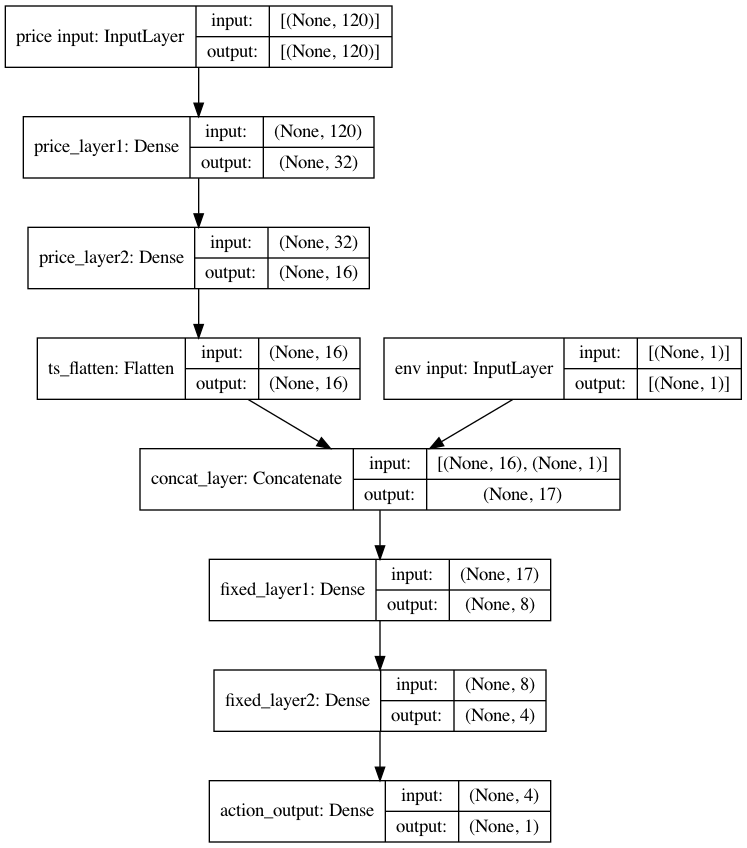

In [26]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [36]:
history = model.fit({"price input":np.ones((1,window,1)), "env input":np.ones((1,1))},
                    {"action_output":np.ones((1,1))}
                   )

TypeError: 'NoneType' object is not callable

In [221]:
pred = model.predict({"price input":np.ones((1,2)), "bank input":np.ones((1,1))})
pred.shape

(1, 1)

In [40]:
a = []
for _ in range(10):
    a.append([-1])
a

[[-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1], [-1]]

In [41]:
np.array(a)

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]])